In [1]:
"""
Import necessary libraries
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
import csv

In [2]:
"""
The "y_vector" function finds the dot product of a parameter vector and an X vector.
Parameters:
-theta_vector: The parameter vector
-train_set: The X vector
Returns:
-A Y vector
"""
def y_vector(theta_vector, X_vector):
    return theta_vector.dot(X_vector.T)


"""
Implementation of the Least Squares method.
Parameters:
-train_X: The X vector of the training set
-train_y: The Y vector of the training set
Returns:
-A calculated parameter vector
"""
def least_squares(train_X , train_y):
    return np.linalg.inv(train_X.T.dot(train_X)).dot(train_X.T).dot(train_y)

"""
Calculation of the Mean Square Error.
Parameters:
-y1: The Y vector of the training set
-y2: The estimated Y vector
-axis: The axis on which the mean is going to be calculated (default: axis=0)
Returns:
-The Mean Square Error 
"""
def rmse(y1, y2):
    return np.sqrt((1/N)*np.sum((y1-y2)**2))


"""
The "get_Phi" calculates the Phi matrix.
Parameters:
-x: Initial X vector
-dp: Polynomial degrees
-N: Number of points
Returns:
-The Phi matrix of shape N x dp+1
"""
def get_Phi(x, dp, D):
    phi_pol = x
    for i in range(2,dp+1):
       phi_pol = np.c_[phi_pol, x**(i)]
    phi_matrix = np.c_[np.ones((D,1)), phi_pol]
    return phi_matrix

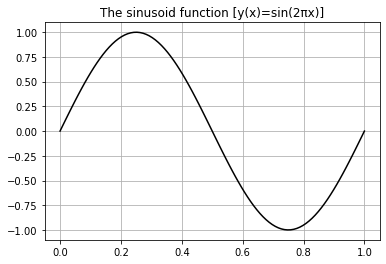

In [3]:
#Total number of values from the interval
X = np.linspace(0, 1, 100)
Y = np.sin(2*math.pi*X)

plt.plot(X, Y, "k-")
plt.grid()
plt.title("The sinusoid function [y(x)=sin(2πx)]")
plt.show()

For N = 10 and 2 polynomial degrees, RMSE = 0.748
Coefficients of the model: 0.58 -3.822 2.614

For N = 10 and 3 polynomial degrees, RMSE = 0.6291
Coefficients of the model: -0.0 5.73 -22.563 16.784

For N = 10 and 4 polynomial degrees, RMSE = 0.52316
Coefficients of the model: -0.372 19.676 -92.987 129.742 -56.479

For N = 10 and 5 polynomial degrees, RMSE = 0.48623
Coefficients of the model: -0.241 7.728 6.607 -151.778 266.207 -129.074

For N = 10 and 9 polynomial degrees, RMSE = 0.00041
Coefficients of the model: -0.209 193.415 -4700.34 46380.411 -238337.051 703802.072 -1237625.36 1278342.566 -714784.854 166728.887

For N = 100 and 2 polynomial degrees, RMSE = 0.93674
Coefficients of the model: 0.462 -0.522 -1.068

For N = 100 and 3 polynomial degrees, RMSE = 0.92802
Coefficients of the model: 0.144 3.389 -10.895 6.552

For N = 100 and 4 polynomial degrees, RMSE = 0.9195
Coefficients of the model: -0.196 10.522 -43.371 57.237 -25.343

For N = 100 and 5 polynomial degrees, RMSE = 0.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


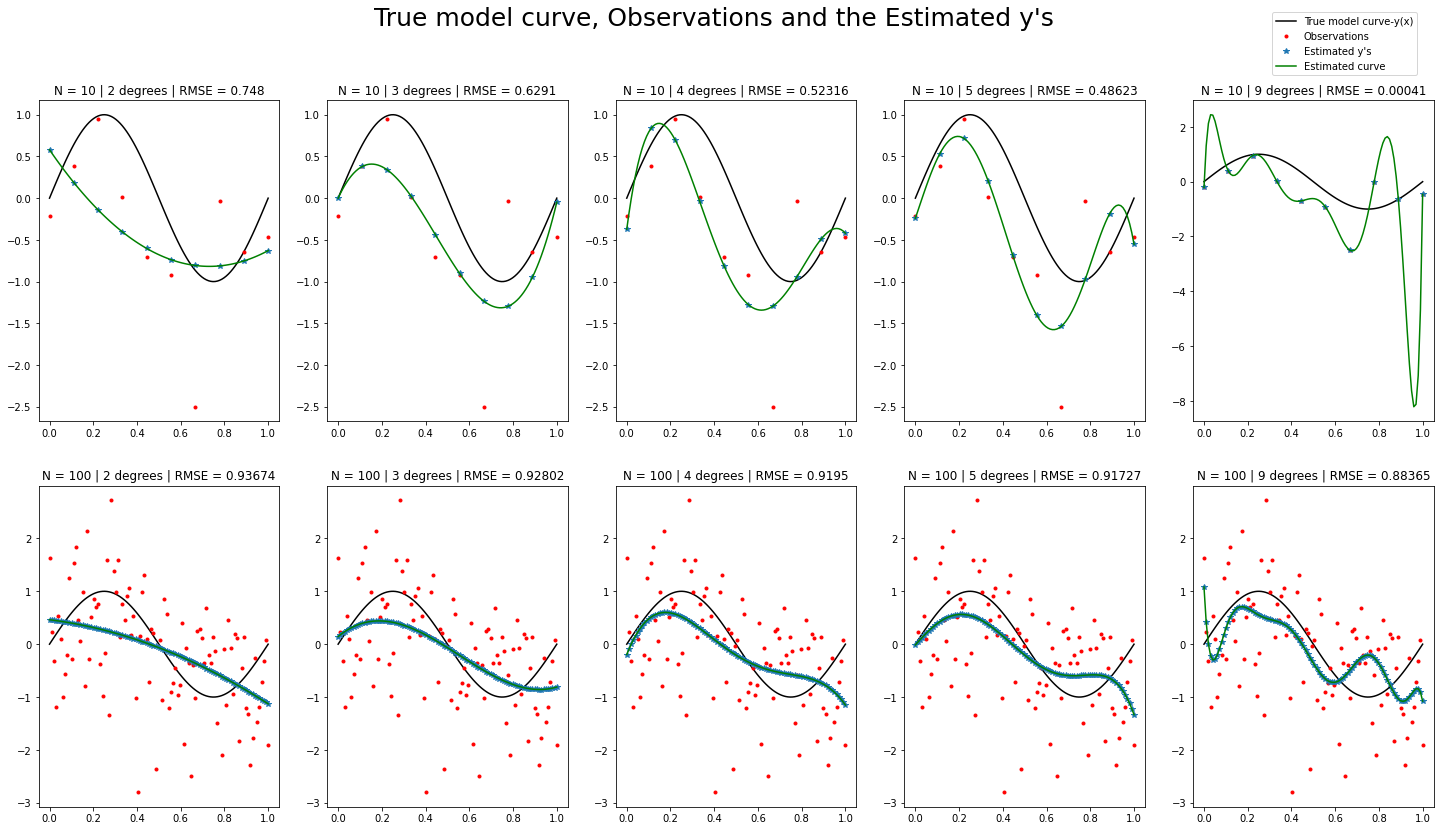

In [4]:
#N values
N_vector = [10, 100]

#Degrees of freedom
degrees_pol = [2, 3, 4, 5, 9]

#Store the RMSE metric
RMSE_list = []
#
bars = []

rows = 2
columns = 5
fig, axs = plt.subplots(rows, columns, figsize=(25,13))
theta_ls_list = []

for r, N in  enumerate(N_vector): #Repeat for every N

    #Generate N uniformly distributed x values between 0 and 1
    x_vector = np.linspace(0, 1, N)
    #Calculate the y vector
    y_vector = np.sin(2*math.pi*x_vector)

    #Create noisy observations N(0,1)
    noise_train = np.random.normal(0, 1**0.5, N)
    y_train_noise = np.add(y_vector, noise_train)

    for c, M in enumerate(degrees_pol):  #Repeat for every polynomial model degree
        #Create the polynomial matrix and add a column of ones
        #Get the Phi matrix for the training set
        Phi = get_Phi(x_vector, M, N)

        #Perform least squares to produce the parameter vector
        theta_LS = least_squares(Phi, y_train_noise)
        
        theta_LS_str = ' '.join(str(round(e,3)) for e in theta_LS)
        theta_ls_list.append(theta_LS.tolist())
        

        Phi_X = get_Phi(X, M, 100)
        Y_predicted_line = theta_LS.dot(Phi_X.T)

        #Make predictions using the new parameter vector
        y_predicted = theta_LS.dot(Phi.T)

        #Calculate the RMSE statistic and store it
        RMSE = rmse(y_train_noise, y_predicted)
        RMSE_list.append(RMSE)


        bar = str(N) + "|" + str(M)
        bars.append(bar)
        print("For N = {} and {} polynomial degrees, RMSE = {}".format(str(N), str(M), str(round(RMSE, 5))))
        print("Coefficients of the model:", theta_LS_str)
        print()

        #Calculate the mean and the variance of each y
        y_train_mu = np.mean(y_predicted, axis = 0)
        y_train_var = np.var(y_predicted, axis = 0)
        
        #Create image
        label = "N = {} | {} degrees | RMSE = {}".format(str(N), str(M), str(round(RMSE, 5)))
        l1 = axs[r,c].plot(X, Y, "k-")
        l2 = axs[r,c].plot(x_vector, y_train_noise, 'r.')
        l3 = axs[r,c].plot(x_vector, y_predicted, linestyle='None', marker='*')
        l4 = axs[r,c].plot(X, Y_predicted_line, "g-")
        axs[r,c].set_title(label)


line_labels = ["True model curve-y(x)", "Observations", "Estimated y's", "Estimated curve"]

fig.suptitle('True model curve, Observations and the Estimated y\'s', fontsize=25)

fig.legend(
    [l1, l2, l3, l4],
    labels=line_labels,
    loc='upper right', bbox_to_anchor=(0.79, 0.88)
)
plt.show()



In [5]:
#Extract the coefficients in a csv file
theta_ls_list_final = []
for row in theta_ls_list:
    if len(row) < 10:
        for i in range(10-len(row)):
            row.append(None)
    theta_ls_list_final.append(row)
csvfile = "csv_file.csv"

with open(csvfile, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)
        
    # writing the data rows 
    csvwriter.writerows(theta_ls_list_final)